# Lecture 20-22:  A numerical scheme for the solution of the latitude EBM

This numerical scheme uses insight on the ice line position. 

Once the ice line position is known, then an explicit formula for the temperature is known.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Set the parameters according to those given in lectures

In [6]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

# average albedo (function of ice line)
abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
# average temp (function of ice line)
Tbar = lambda ys, Q: (Q*(1 - abar(ys)) - A)/B 
# average temp in ice state
Tbari = lambda Q: (Q*(1 - ai)- A)/B
# average temp in water state
Tbarw = lambda Q: (Q*(1 - aw)- A)/B

# Explicit water solution
Twater = lambda y, Q: Q/(B+k)*(s(y)*(1-aw) + k/B*(1-aw))-A/B;
Tice = lambda y, Q: Q/(B+k)*(s(y)*(1-ai) + k/B*(1-ai))-A/B;

## Plot the pure ice and pure water states 

We had previously solved for the explicit solution for the pure-ice and pure-water states. We can now plot this as a function of the latitude coordinate

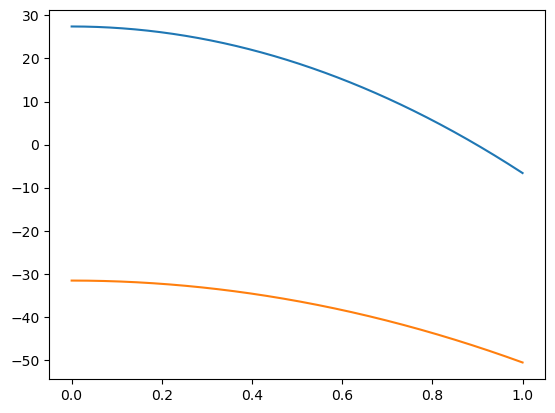

In [7]:
# Let's plot the solutions at Q = 343
y = np.linspace(0,1,500);
Q0 = 342;
plt.plot(y, Twater(y, Q0))
plt.plot(y, Tice(y, Q0))

## Solving for the mixed states

In order to solve for the mixed steps, we: 

1. Solve firstly for the ice-line position via the condition that $T = T_C$ at $a = a_s$. This can be done via eqn (16.7) in the notes, which is:

$$
Q = K(y_s) \equiv \frac{\left(T_C + \frac{A}{B}\right)(B + k)}{s(y_s)[1 - \frac{1}{2}(a_i + a_w)] + \frac{k}{B}(1 - \bar{a})}.
$$

2. We then can use the explicit temperature solution given by (16.3), where everything on the RHS is now known

$$
T(y) = \Phi(T) = \frac{k\bar{T}_\infty + Qs(y)(1 {\color{blue}-} a(y)) - A}{B + k}.
$$ 

(Above we've replaced $T_\infty$ with $T$ for simplicity)


In [11]:
# Define the K function 
Kfunc = lambda ys: (Tc + A/B)*(B+k)/(s(ys)*(1 - (ai+aw)/2) + k/B*(1 - abar(ys)))

# Define the albedo, 
def afun(y, ys): 
    # albedo function
    a = 0*y
    for i, yy in enumerate(y):
        if yy < ys:
            aa = aw
        elif yy > ys:
            aa = ai
        else:
            aa = (ai+aw)/2
        a[i] = aa
    return a

# Once ys is known, we can substitute it all to determine the termperature
T = lambda y, ys, Q: (k*Tbar(ys,Q) + Q*s(y)*(1 - afun(y,ys)) - A)/(B+k);

In this next part of the code, given a value of $Q = Q_0$, we solve for the ice line position, then finally plot the temperatures

The solution converged.
Solved ice line =  0.9394721159996656
The solution converged.
Solved ice line =  0.25615270185042965


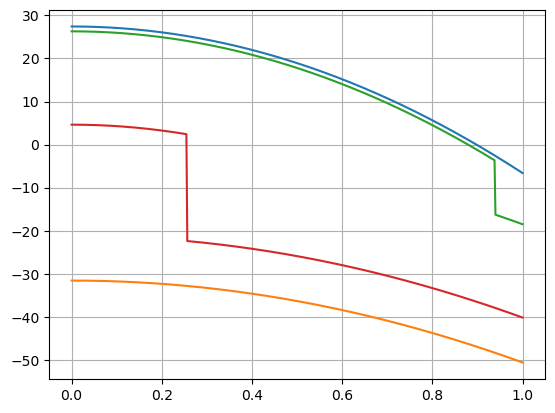

In [30]:
# Let's plot the solutions at Q = 343
y = np.linspace(0,1,500);
Q0 = 342;
plt.plot(y, Twater(y, Q0))
plt.plot(y, Tice(y, Q0))

# Design a function that solves Q0 = K(ys), i.e. K(ys) - Q0 = 0
fwd = lambda ys: Kfunc(ys) - Q0;

# Run the solver and output diagnostics
sol, info, ier, mesg = fsolve(fwd, 0.95, full_output="True"); 
# Extract the first entry of the vector
solys = sol[0] 
print(mesg)
print('Solved ice line = ', solys)
# Plot the solution
plt.plot(y, T(y, solys, Q0))

# Run the solver and output diagnostics
sol, info, ier, mesg = fsolve(fwd, 0.2, full_output="True"); 
# Extract the first entry of the vector
solys = sol[0] 
print(mesg)
print('Solved ice line = ', solys)
# Plot the solution
plt.plot(y, T(y, solys, Q0))
plt.grid(1)